In [18]:
# some useful mysklearn package import statements and reloads
import importlib
import matplotlib.pyplot as plt
import copy

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.pokemonDiscretizers
importlib.reload(mysklearn.pokemonDiscretizers)
import mysklearn.pokemonDiscretizers as pokemonDiscretizers

# Legendary Pokemon Classifier
CPSC 322, Spring 2022  
By: Riley Sikes and Kai Courtney  

<img src="legendary.jpg" alt="legendary pokemon" width="600"/>  


## Introduction

#### Dataset Information
The dataset we chose to mine and classify was this [pokemon dataset](https://www.kaggle.com/datasets/rounakbanik/pokemon) we found on kaggle. The dataset has the following attributes as described on kaggle.
* name: The English name of the Pokemon 
* japanese_name: The Original Japanese name of the Pokemon 
* pokedex_number: The entry number of the Pokemon in the National Pokedex * percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless. 
* type1: The Primary Type of the Pokemon 
* type2: The Secondary Type of the Pokemon 
* classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex 
* height_m: Height of the Pokemon in metres
* weight_kg: The Weight of the Pokemon in kilograms 
* capture_rate: Capture Rate of the Pokemon 
* baseeggsteps: The number of steps required to hatch an egg of the Pokemon * abilities: A stringified list of abilities that the Pokemon is capable of having 
* experience_growth: The Experience Growth of the Pokemon 
* base_happiness: Base Happiness of the Pokemon 
* against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type 
* hp: The Base HP of the Pokemon 
* attack: The Base Attack of the Pokemon 
* defense: The Base Defense of the Pokemon 
* sp_attack: The Base Special Attack of the Pokemon 
* sp_defense: The Base Special Defense of the Pokemon 
* speed: The Base Speed of the Pokemon generation: The numbered generation which the Pokemon was first introduced 
* is_legendary: Denotes if the Pokemon is legendary.

Many of these attributes are specific to a single pokemon or are just too specific to be used for classification, so we narrowed down our base feature set to contain just the following attributes.
* height_m
* weight_kg
* capture_rate
* experience_growth
* base_happiness
* hp
* attack
* defense
* sp_attack
* sp_defense
* speed
* is_legendary
We initially had type1 and typ2 as part of our feature set, but found that these attributes were not contributing much towards our classifiers.

The attribute we are going to try and predict is the __is_legendary__ attribute.
* 0 is not legendary
* 1 is legendary




#### Best Classifier
We ran our dataset through the following classifiers using a stratified 10 fold cross validation train test split, resulting in the corresponding statisticss and matrices.

__Dummy__  
Accuracy =  0.888 , Error rate = 0.112  
Precision =  0.444 , Recall  = 0.5 , F1  = 0.47  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 731 |  0   |   731  |            100.0|
|1  |  92  | 0  |     92   |           0.0|

__Naive Bayes__  
Accuracy =  0.954 , Error rate = 0.046  
Precision =  0.494 , Recall  = 0.48 , F1  = 0.487  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 702 |  29   |   731  |            96.03|
|1  |  9  | 83  |     92   |           90.22|

__Decision Tree__  
Accuracy =  0.942 , Error rate = 0.058  
Precision =  0.483 , Recall  = 0.485 , F1  = 0.484  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 709 |  22   |   731  |            96.99|
|1  |  26  | 66  |     92   |           71.74|

__Random Forest__  
Accuracy =  0.945 , Error rate = 0.055  
Precision =  0.482 , Recall  = 0.487 , F1  = 0.485  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 712 |  19   |   731  |            97.4|
|1  |  26  | 66  |     92   |           71.74|

__KNN__  
(with only attack, base_happiness, base_total, capture_rate, experience_growth, defense)  
Accuracy =  0.957 , Error rate = 0.043  
Precision =  0.486 , Recall  = 0.49 , F1  = 0.488  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 712 |  19   |   731  |            97.4|
|1  |  26  | 66  |     92   |           71.74|

__Conclusion__
By looking at these results, there are two standout classifiers: Naive Bayes and Knn.

Knn has the highest stand alone accuracy, but Naive Bayes is the only classifier to have over 90% accuracy for both legendary and non-legendary classification. Based off of this our best classifier is __Naive Bayes__.

## Data Analysis

__General Information__  

Our classifiers use the following numeric attributes to try and predict the binary is_legendary attribute.
* height_m
* weight_kg
* capture_rate
* experience_growth
* base_happiness
* hp
* attack
* defense
* sp_attack
* sp_defense
* speed
* is_legendary  

The dataset has a total of 823 instances (which is less than the expected 1000, but there aren't even 1000 pokemon so we're working with what we have)

__Discretizers__  

Since our attributes are only numeric attributes, we had to convert them to categorical attributes for the sake of classification. To do this we used equal width binning to produce custom discretizers for each of the attributes. We used the code block below to generate the cutoffs for our discretizer functions.

You can test the function yourself by replacing the input to the line 
`col = pokemonData.get_column("attack")` with any of the valid attribute names. You can also adjust the number of bins by changing the input to the line `cutoffs = pokemonDiscretizers.compute_equal_width_cutoffs(col, 5)`.

Using this also allowed us to look at the distribution of the attributes which helped us decide how many bins we needed.

[5.0, 40.2, 75.4, 110.6, 145.8, 181.0]
[93, 342, 272, 105, 11]


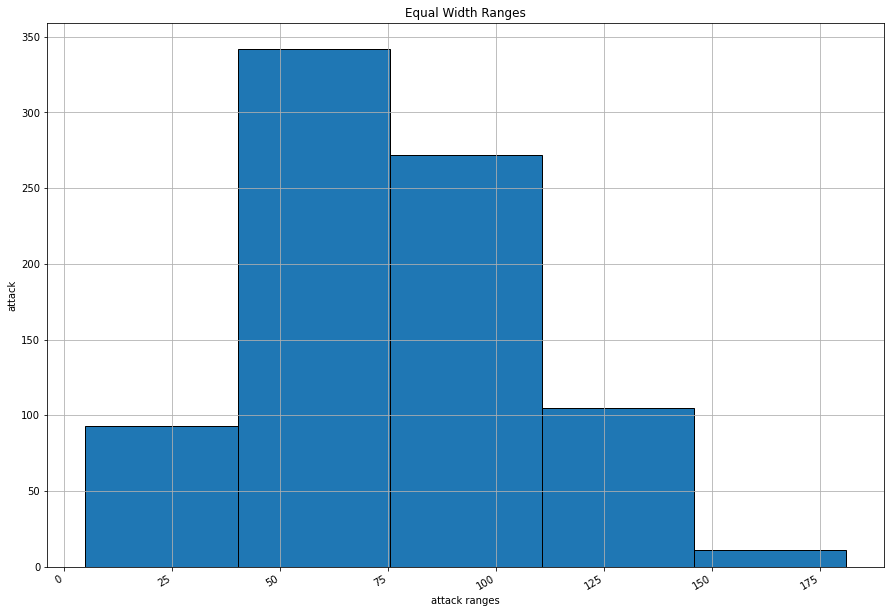

In [19]:
pokemonData = MyPyTable()
completePokemonData = MyPyTable()

pokemonData.load_from_file("pokemon - pokemon.csv")
completePokemonData.load_from_file("pokemon - pokemon.csv")

cols_to_drop = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24, 29, 30, 31, 32, 36, 37, 39]
# abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
#  0,            1,             2,         3,            4,              5,           6,               7,             8,            9,           10,           11             12        13              14           15               16              17             18      19    20              21             22              23        24            25    26                27     28   29            30    31              32           33         34         35    36   37       38          39       40
pokemonData.drop_cols(cols_to_drop)

col = pokemonData.get_column("attack")

cutoffs = pokemonDiscretizers.compute_equal_width_cutoffs(col, 5)
print(cutoffs)
# 2. 
freqs = pokemonDiscretizers.compute_bin_frequencies(col, cutoffs)
print(freqs)
# 3.
plt.figure(figsize=(15, 10))
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1] - cutoffs[0]), edgecolor="black", align="edge")
plt.title("Equal Width Ranges")
plt.xlabel("attack ranges")
plt.ylabel("attack")
plt.xticks(rotation=30, ha="right") # parallel lines
plt.grid(True)
plt.show()

__Summary Statistics__  

Here are the summary statistics of the data set. This on it's own doesn't really tell us much besides the distribution of class labels which is greatyly skewed towards non-legendary.

In [20]:
pokemonData.compute_summary_statistics(["height_m", "weight_kg", "capture_rate", "experience_growth", "base_happiness", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "is_legendary"]).pretty_print()

attribute               min         max         mid           avg    median
-----------------  --------  ----------  ----------  ------------  --------
height_m                0.1   20          10.05       1.20656         1
weight_kg               0.1  999.9       500         66.4394         28
capture_rate            3    255         129         96.4411         60
experience_growth  600000      1.64e+06    1.12e+06   1.06021e+06     1e+06
base_happiness          0    140          70         64.271          70
hp                      1    255         128         69.5772         65
attack                  5    181          93         77.096          75
defense                 5    230         117.5       72.3985         70
sp_attack              10    173          91.5       70.5662         65
sp_defense             20    230         125         70.3949         66
speed                   5    200         102.5       66.4921         65
is_legendary            0      1           0.5      

__Legendary vs Non-legendary Attribute Disributions__

Now we will use box and whiskers plots to analyze the attribute differences between legendary and non-legendary pokemon. This will show us which stats are the best at distinguishing between legendary and non-legendary pokemon. Our initial intuition is that the base total and capture rate attributes are going to be best at distinguishing between the two.

In [34]:
data = pokemonData.data
legendary = []
non_legendary = []
for val in data:
    # print(val)
    if val[-1] == 1.0:
        legendary.append(val)
    else:
        non_legendary.append(val)

legend_mypy = MyPyTable()
non_legend_mypy = MyPyTable()

headers = ["attack","base_happiness","base_total","capture_rate","defense","experience_growth","height_m","hp","sp_attack","sp_defense","speed","weight_kg","is_legendary"]

legend_mypy.data = legendary
legend_mypy.column_names = headers

non_legend_mypy.data = non_legendary
non_legend_mypy.column_names = headers


From these two following graphs, we can see that non-legendary pokemone have stat averages around 60 - 70 for each base stat while legendary pokemon are averaging over 100 for each of their base stats.

<Figure size 432x288 with 0 Axes>

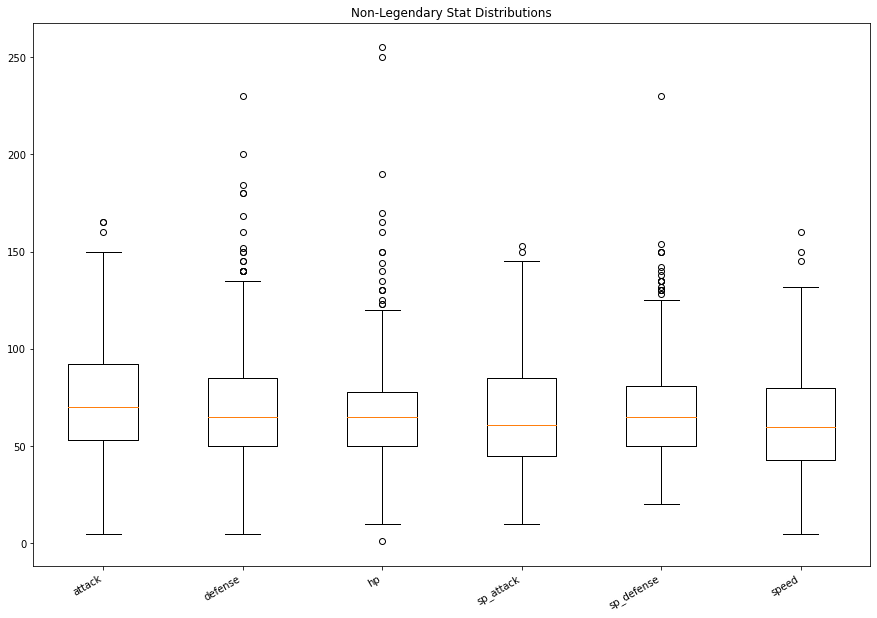

<Figure size 432x288 with 0 Axes>

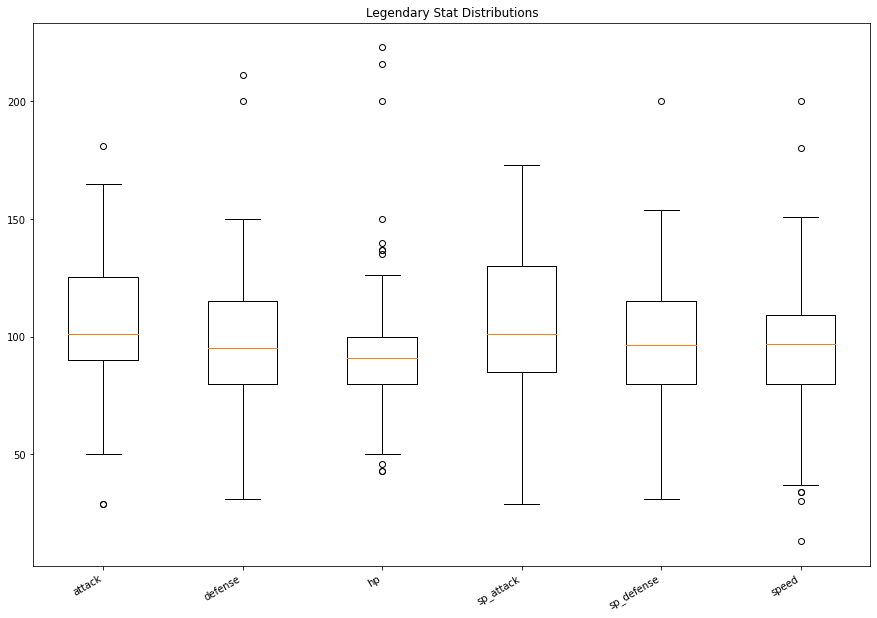

In [53]:
myutils.box_and_whiskers_helper([non_legend_mypy.get_column("attack"), non_legend_mypy.get_column("defense"), non_legend_mypy.get_column("hp"), non_legend_mypy.get_column("sp_attack"), non_legend_mypy.get_column("sp_defense"), non_legend_mypy.get_column("speed")], ["attack", "defense", "hp", "sp_attack", "sp_defense", "speed"], "Non-Legendary Stat Distributions")
myutils.box_and_whiskers_helper([legend_mypy.get_column("attack"), legend_mypy.get_column("defense"), legend_mypy.get_column("hp"), legend_mypy.get_column("sp_attack"), legend_mypy.get_column("sp_defense"), legend_mypy.get_column("speed")], ["attack", "defense", "hp", "sp_attack", "sp_defense", "speed"], "Legendary Stat Distributions")

From the following graph we can see that legendary pokemon have a significantly higher base total stat average than non-legendary pokemone. This is a great stat for classification.

<Figure size 432x288 with 0 Axes>

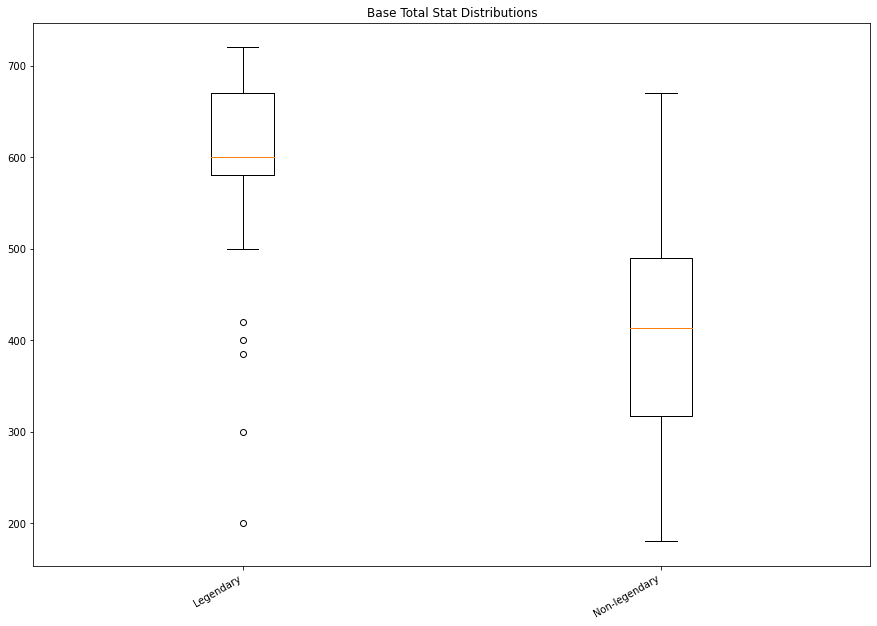

In [55]:
myutils.box_and_whiskers_helper([legend_mypy.get_column("base_total"), non_legend_mypy.get_column("base_total")], ["Legendary", "Non-legendary"], "Base Total Stat Distributions")

From the following graph we can see that legendary pokemon have an average capture rate of close to 0, while non-legendary pokemon average 50 - 100. This is another great attribute for classification.

<Figure size 432x288 with 0 Axes>

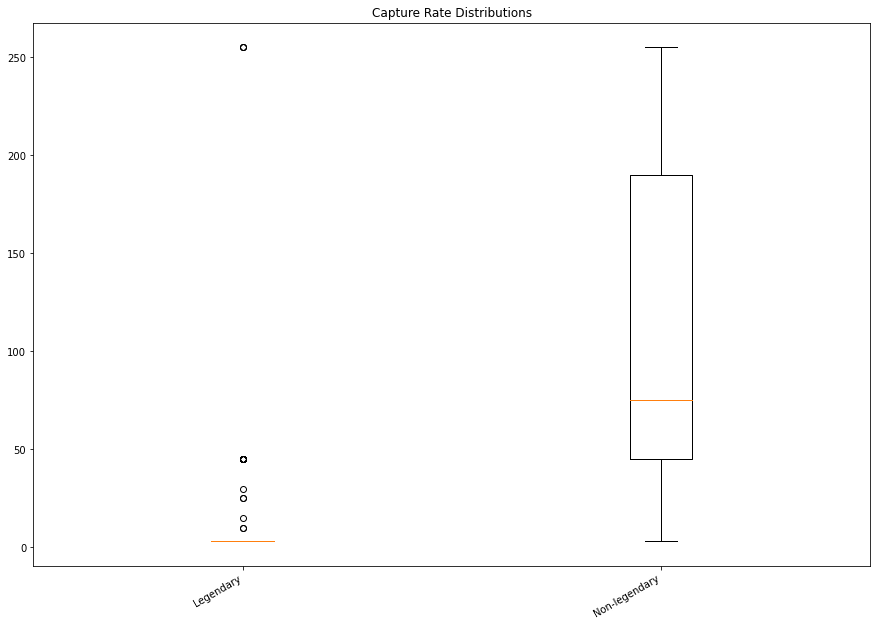

In [56]:
myutils.box_and_whiskers_helper([legend_mypy.get_column("capture_rate"), non_legend_mypy.get_column("capture_rate")], ["Legendary", "Non-legendary"], "Capture Rate Distributions")

From the following graph we can see that legendary pokemone have a higher average experience growth, but more importantly they have a very consistent experience growth with only one outlier.

<Figure size 432x288 with 0 Axes>

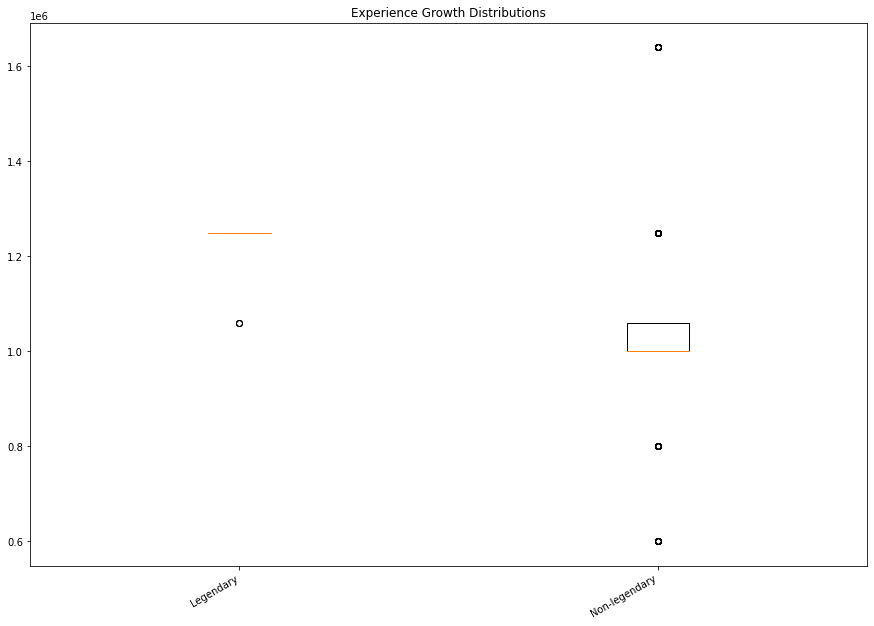

In [57]:
myutils.box_and_whiskers_helper([legend_mypy.get_column("experience_growth"), non_legend_mypy.get_column("experience_growth")], ["Legendary", "Non-legendary"], "Experience Growth Distributions")

From the following two graphs, we can see that legendary pokemon are averaging greater values in both height and weight meaning they are overall larger.

<Figure size 432x288 with 0 Axes>

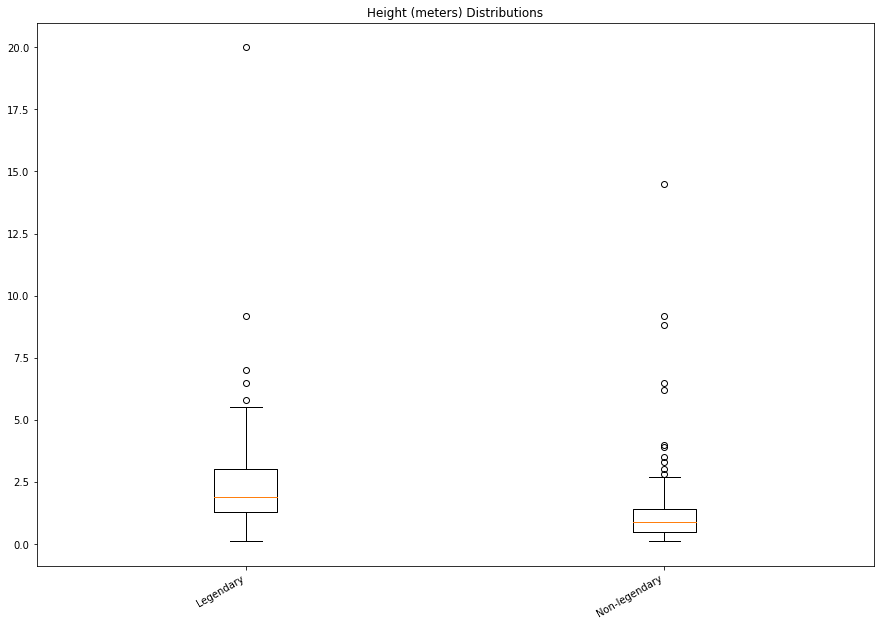

In [51]:
myutils.box_and_whiskers_helper([legend_mypy.get_column("height_m"), non_legend_mypy.get_column("height_m")], ["Legendary", "Non-legendary"], "Height (meters) Distributions")

<Figure size 432x288 with 0 Axes>

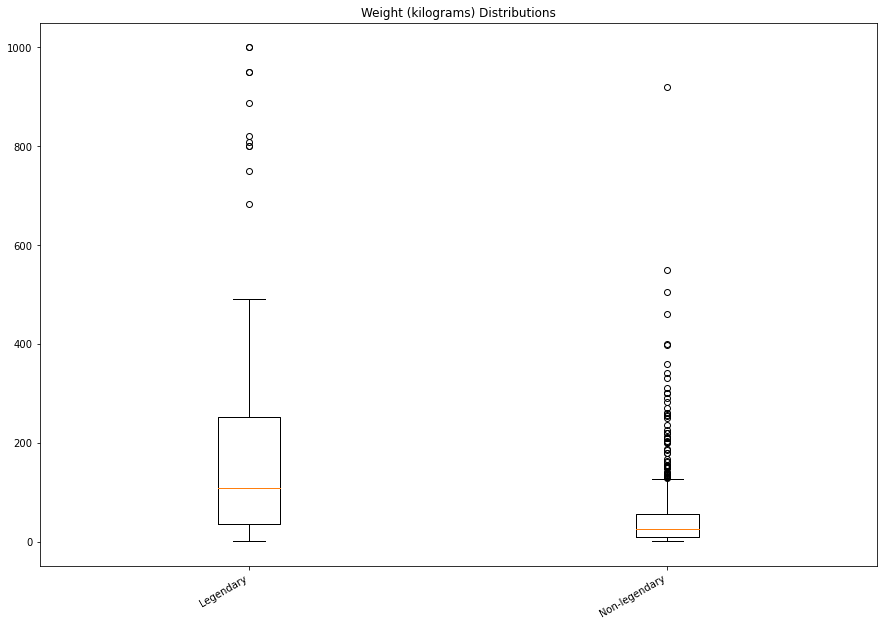

In [52]:
myutils.box_and_whiskers_helper([legend_mypy.get_column("weight_kg"), non_legend_mypy.get_column("weight_kg")], ["Legendary", "Non-legendary"], "Weight (kilograms) Distributions")

## Classification Results

We ran our dataset through all of the following classifiers.
* Dummy
* Naive Bayes
* Knn
* Decision Tree
* Random Forest
We used stratified 10 fold cross validation for all of our classifiers to get the best distribution of instances. All of the classifiers were already implemented from previous programming assignments, except the MyRandomForestClassifier.

__MyRandomForestClassifier__

To implement the MyRandomForestClassifier, we made a _test_myrandomforest.py_ to test both the `fit` and `predict` metthods of the classifier. To code the classifier, we used the interview dataset as a test dataset to guide the implementation. The algorithm we implemented for the classifier was the same as the one in the notes which is the following.

1. Divide  into a test and remainder set
    * Take 1/3 for test set, 2/3 for remainder set
    * Ensure test set has same distribution of class labels as  ("stratified")
    * Randomly select instances when generating test set
1. Create  bootstrap samples from remainder set
    * Each results in a training (63%) and validation (36%) set
    * Build and test a classifier for each of the N bootstrap samples
    * Each classifier is a decision tree using -sized random attribute subsets
    * Determine accuracy of classifier using validation set
1. Pick the  best classifiers generated in step 2
1. Use test set from step 1 to determine performance of the ensemble of  classifiers (using simple majority voting)

We did not implement the weighted majority voting for the voting method. We just stuck with the simple majority voting.

__Evaluating Predictive Ability__

To decide how each of our classifiers performed, we used the test portion of our stratified 10 fold cross validation and summarized the stats across all 10 folds into accuracy, error rate, precision, recall, F1, and a confusion matrix.

We were mainly looking at the accuracy statistic and the confusion matrix recognition precentatges. Since our dataset has a significant uneven class distribution, it was important to take note of the legendary recognition percentage. Our dummy classifier has an accuracy of 88% which seems good, but actually isn't because it doesn't predict any legendarys.

Due to this fact, we found our best classifier to be __Naive Bayes__ because it has over 90% recognition of both of our class labels.

__Knn__ was a close second though because it had the highest accuracy. To run Knn we had to reduce our attributes values because running over all the attributes takes too long. For this classifier we decided to run it over just the following feature selection.

* attack
* base_happiness
* base_total
* capture_rate
* experience_growth
* defense

The classifier stats and confusion matrices are in the introduction, but are pasted again below for ease.

__Dummy__  
Accuracy =  0.888 , Error rate = 0.112  
Precision =  0.444 , Recall  = 0.5 , F1  = 0.47  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 731 |  0   |   731  |            100.0|
|1  |  92  | 0  |     92   |           0.0|

__Naive Bayes__  
Accuracy =  0.954 , Error rate = 0.046  
Precision =  0.494 , Recall  = 0.48 , F1  = 0.487  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 702 |  29   |   731  |            96.03|
|1  |  9  | 83  |     92   |           90.22|

__Decision Tree__  
Accuracy =  0.942 , Error rate = 0.058  
Precision =  0.483 , Recall  = 0.485 , F1  = 0.484  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 709 |  22   |   731  |            96.99|
|1  |  26  | 66  |     92   |           71.74|

__Random Forest__  
Accuracy =  0.945 , Error rate = 0.055  
Precision =  0.482 , Recall  = 0.487 , F1  = 0.485  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 712 |  19   |   731  |            97.4|
|1  |  26  | 66  |     92   |           71.74|

__KNN__  
(with only attack, base_happiness, base_total, capture_rate, experience_growth, defense)  
Accuracy =  0.957 , Error rate = 0.043  
Precision =  0.486 , Recall  = 0.49 , F1  = 0.488  

|Pokemon Legend |0 |   1   |Total |   Recognition (%)|
|-|-|-|-|-|
|0 | 712 |  19   |   731  |            97.4|
|1  |  26  | 66  |     92   |           71.74|

__Conclusion__  

Based off of this our best classifier is __Naive Bayes__.

## Conclusion

Our classifiers could defintely be improved upon if we spend more time doing EDA looking at the attributes more carefully to create a feature selection that resulted in more accurate classifiers. Another area that could be improved upon is the discretizer bins we used. If we spent more time developing better discretizers, it could result in being able to distinguish between the two class labels better. The fact that the dataset was pretty much all numeric was definetly a challenging aspect of project.

We tried running our __Random Forest__ with many different combinations of N, M, and F but found that N = 30, M = 7, and F = 10 to be the best combination.

In conclusion, the best classifier we found for predicting whether or not a pokemon is legendary is __Naive Bayes__, with __KNN__ as a close second.